#### Load Dataset

In [1]:
import os
from PIL import Image
import numpy as np

In [2]:
def load_images_from_folder(root_dir, image_size=(256, 256)):
    image_data = []
    labels = []
    class_names = sorted(os.listdir(root_dir))
    class_to_idx = {class_name: idx for idx, class_name in enumerate(class_names)}

    for class_name in class_names:
        class_folder = os.path.join(root_dir, class_name)
        for filename in os.listdir(class_folder):
            if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
                path = os.path.join(class_folder, filename)
                try:
                    img = Image.open(path).convert('RGB')
                    img = img.resize(image_size)
                    img_array = np.array(img) / 255.0  # Normalize to [0, 1]
                    image_data.append(img_array)
                    labels.append(class_to_idx[class_name])
                except Exception as e:
                    print(f"Error loading {path}: {e}")

    return np.array(image_data), np.array(labels), class_to_idx

In [3]:
X, y, class_map = load_images_from_folder('dataset', image_size=(128, 128))

print("Loaded images:", X.shape)
print("Labels shape:", y.shape)
print("Class map:", class_map)

Loaded images: (639, 128, 128, 3)
Labels shape: (639,)
Class map: {'Crow': 0, 'Dog': 1, 'Moon': 2, 'Punkalasa': 3, 'Snake': 4, 'Sun': 5, 'Watapatha': 6}


### Data Pre-Process

In [4]:
import cv2

In [5]:
X_resized = np.array([cv2.resize(img, (128, 128)) for img in X])

### Convert to Grayscale

In [6]:
X_gray = np.array([cv2.cvtColor((img * 255).astype(np.uint8), cv2.COLOR_RGB2GRAY) for img in X])
X_gray = X_gray[..., np.newaxis]  

### Apply CLAHE (for poor lighting / blurry stone surfaces)

In [7]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
X_clahe = np.array([
    clahe.apply(cv2.cvtColor((img * 255).astype(np.uint8), cv2.COLOR_RGB2GRAY)) for img in X
])
X_clahe = X_clahe[..., np.newaxis] / 255.0  # Normalize and add channel dim


### Normalization 

###  Data Augmentation

In [8]:
import random
def random_flip(img):
    if random.random() > 0.5:
        return np.fliplr(img)
    return img

X_aug = np.array([random_flip(img) for img in X])

In [9]:
X_processed = X
y = y

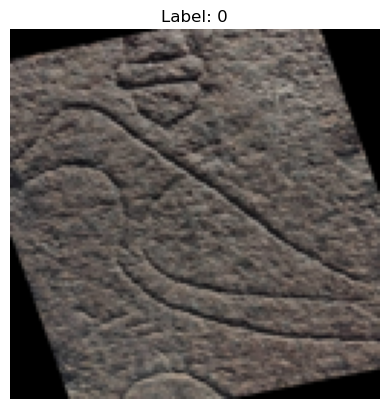

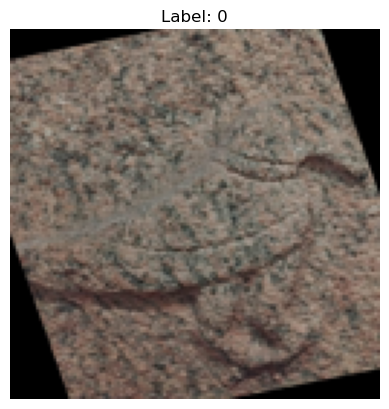

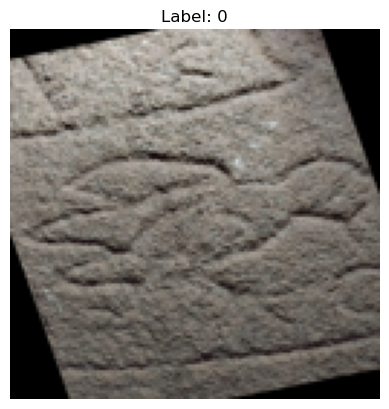

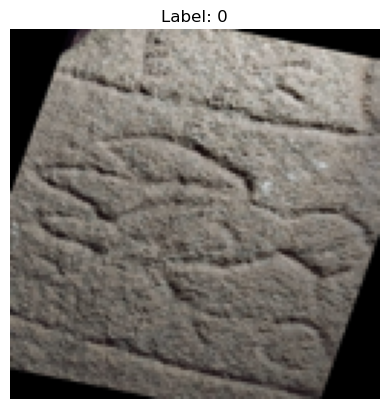

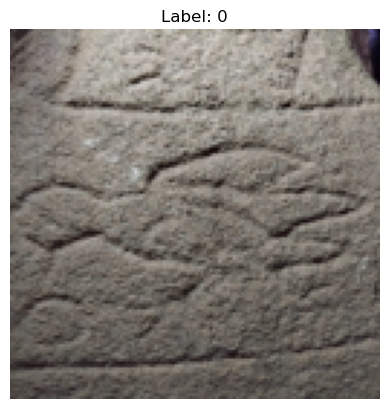

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Just show 5 images from the processed data
for i in range(5):
    img = X_processed[i]  # This should be (H, W, C)
    label = y[i]          # This should be the numeric class index
    plt.imshow(img.squeeze(), cmap='gray' if img.shape[-1] == 1 else None)
    plt.title(f"Label: {label}")
    plt.axis('off')
    plt.show()

### Blury Image Handling

In [11]:
import cv2
import numpy as np

In [12]:
def sharpen_image(img):
    # Use a sharpening kernel
    kernel = np.array([[0, -1, 0],
                       [-1, 5,-1],
                       [0, -1, 0]])
    return cv2.filter2D(img, -1, kernel)

In [13]:
def boost_contrast(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    return cv2.equalizeHist(img_gray)

In [14]:
def clahe_enhance(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
    return clahe.apply(img_gray)

In [15]:
img = X_processed[i]                         # (H, W, 3) float32 in [0, 1]
img_uint8 = (img * 255).astype(np.uint8)     # Convert to uint8
img_rgb = cv2.cvtColor(img_uint8, cv2.COLOR_RGB2BGR)  # OpenCV uses BGR by default
img_denoised = cv2.fastNlMeansDenoisingColored(img_rgb, None, 10, 10, 7, 21)


In [16]:
import matplotlib.pyplot as plt

def show_image(img, title=None, cmap=None):
    plt.imshow(img, cmap=cmap)
    if title:
        plt.title(title)
    plt.axis('off')
    plt.show()

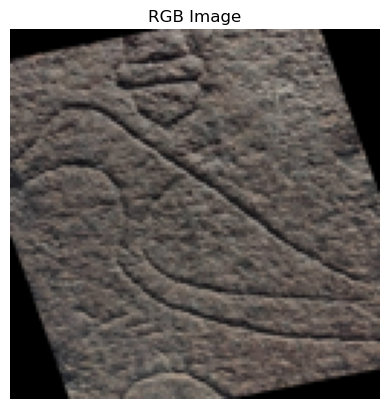

In [17]:
img = X_processed[0]  # shape: (H, W, 3) or (H, W, 1)
if img.shape[-1] == 1:
    show_image(img.squeeze(), title="Grayscale", cmap='gray')
else:
    show_image(img, title="RGB Image")

Shape: (128, 128, 3)
Dtype: float64
Min: 0.0 Max: 0.6941176470588235


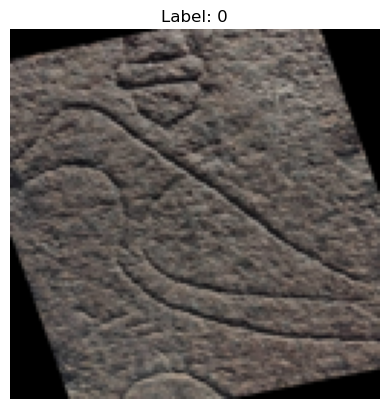

In [18]:
def debug_image(img, label=None):
    print("Shape:", img.shape)
    print("Dtype:", img.dtype)
    print("Min:", img.min(), "Max:", img.max())
    cmap = 'gray' if img.shape[-1] == 1 else None
    show_image(img.squeeze() if img.shape[-1] == 1 else img, title=f"Label: {label}", cmap=cmap)

# Example usage
debug_image(X_processed[0], y[0])

In [19]:
import cv2
import numpy as np

In [20]:
def sharpen_image(img):
    # Use a sharpening kernel
    kernel = np.array([[0, -1, 0],
                       [-1, 5,-1],
                       [0, -1, 0]])
    return cv2.filter2D(img, -1, kernel)


In [21]:
def boost_contrast(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    return cv2.equalizeHist(img_gray)

In [22]:
def clahe_enhance(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
    return clahe.apply(img_gray)

In [23]:
def denoise_image(img):
    # Convert to uint8 if needed
    if img.dtype != np.uint8:
        img = (img * 255).astype(np.uint8)

    # Make sure it's 3 channels
    if len(img.shape) == 2 or img.shape[2] == 1:
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

    return cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 21)